In [31]:
import pandas as pd

In [54]:
names=['Company','Bean Origin','REF','Review Date','Cocoa Percent','Company Location','Rating','Bean Type','Broad Bean Origin']
chocolate_bar_ratings = pd.read_csv("C:\\Users\\michael.clawson\\Desktop\\Machine Learning\\chocolate-bar-ratings\\flavors_of_cacao.csv",
                                   header=None, skiprows=1, names=names)

In [74]:
chocolate_bar_ratings.head()

,Company,Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [76]:
chocolate_bar_ratings["Cocoa Percent"] = chocolate_bar_ratings["Cocoa Percent"].map(lambda x: float(x[:-1]))

In [78]:
chocolate_bar_ratings.head()

,Company,Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


This data is now pretty clean.

In [57]:
chocolate_bar_ratings.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [58]:
chocolate_bar_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company              1795 non-null object
Bean Origin          1795 non-null object
REF                  1795 non-null int64
Review Date          1795 non-null int64
Cocoa Percent        1795 non-null object
Company Location     1795 non-null object
Rating               1795 non-null float64
Bean Type            1794 non-null object
Broad Bean Origin    1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [59]:
chocolate_bar_ratings.columns

Index(['Company', 'Bean Origin', 'REF', 'Review Date', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin'],
      dtype='object')

Now, I was curious what the mean rating was by company location, which are as follows: 

In [60]:
chocolate_bar_ratings.groupby(['Company Location'])['Rating'].mean()

Company Location
Amsterdam            3.500000
Argentina            3.305556
Australia            3.357143
Austria              3.240385
Belgium              3.093750
Bolivia              3.250000
Brazil               3.397059
Canada               3.324000
Chile                3.750000
Colombia             3.173913
Costa Rica           3.138889
Czech Republic       2.750000
Denmark              3.283333
Domincan Republic    3.200000
Ecuador              3.009259
Eucador              3.000000
Fiji                 3.250000
Finland              3.250000
France               3.251603
Germany              3.178571
Ghana                2.750000
Grenada              2.833333
Guatemala            3.350000
Honduras             3.208333
Hungary              3.204545
Iceland              3.416667
India                2.500000
Ireland              2.812500
Israel               3.250000
Italy                3.325397
Japan                3.088235
Lithuania            3.166667
Madagascar           3.

In [62]:
chocolate_bar_ratings.groupby(['Review Date'])['Rating'].mean()

Review Date
2006    3.125000
2007    3.162338
2008    2.994624
2009    3.073171
2010    3.148649
2011    3.256061
2012    3.178205
2013    3.197011
2014    3.189271
2015    3.246491
2016    3.226027
2017    3.312500
Name: Rating, dtype: float64

It would be nice to find if chocolate quality varied by year. To do that, we can see if there is any meaningful correlation between the date and review date. It seems not, as there is only a 10% correlation.

In [61]:
chocolate_bar_ratings.corr()

,REF,Review Date,Rating
REF,1.000000,0.985076,0.101030
Review Date,0.985076,1.000000,0.099846
Rating,0.101030,0.099846,1.000000


To get an even better sense of whether ratings climb or fall by the year, we can run a regression:

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
# shows graphs in notebook
%matplotlib inline

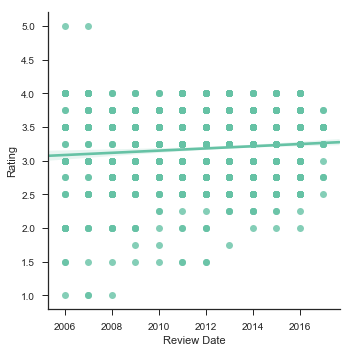

In [84]:
sns.lmplot(x='Review Date', y='Rating', data=chocolate_bar_ratings)

There seems to be a small increase in chocolate ratings as time goes on, but that could be due to less newer chocolates being sampled at later dates.

What kind of ratings do our chocolate raters give the chocolates? Here we break it down by cocoa percentage as well as get a view of the distribution of chocolate ratings. It seems to almost be a normal distribution, which we would generally expect to see increase as the sample size is augmented.

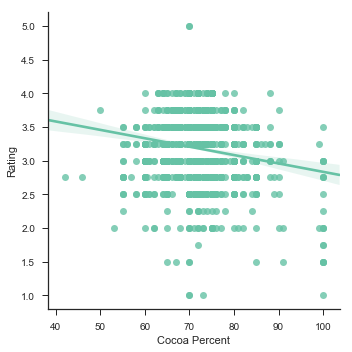

In [79]:
sns.lmplot(x='Cocoa Percent', y='Rating', data=chocolate_bar_ratings)

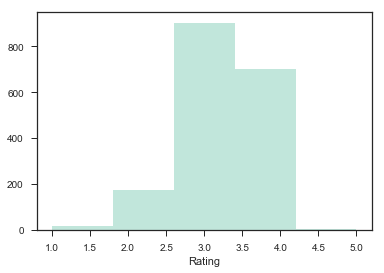

In [82]:
sns.distplot(chocolate_bar_ratings.Rating, kde=False, bins=5)